In [8]:
#Defining the DataSet
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import AerSimulator
from sklearn import datasets
from sklearn.model_selection import train_test_split

SEED = 123
qasm_sim = AerSimulator()

In [9]:

x,y = datasets.make_circles(n_samples=100, noise=0, random_state=SEED)
print(type(x))

<class 'numpy.ndarray'>


In [10]:
# Normalizatin
x[:,0] = x[:,0] / (np.max(x[:,0]) - np.min(x[:,0]))
x[:,1] = x[:,1] / (np.max(x[:,1]) - np.min(x[:,1]))

num_classes = 2
num_features = 2
adhoc_dimension = 2
x_blue = x[y==0]
x_red = x[y==1]

test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=SEED, stratify=y)

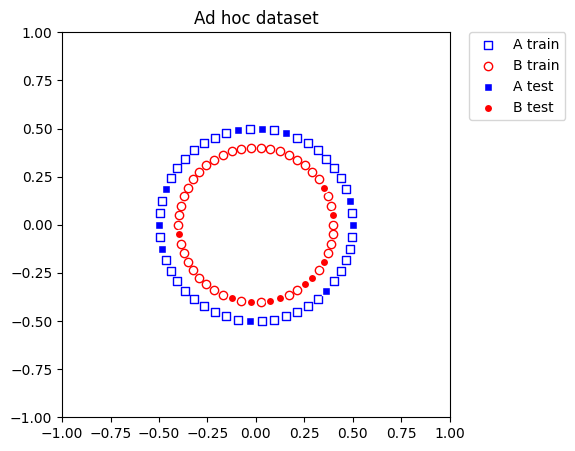

In [11]:
# Plot of the dataset

def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(x_train, y_train,x_test, y_test):

# train_features, train_labels, test_features, test_labels
    plt.figure(figsize=(5, 5))
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    # plt.imshow(
    #     np.asmatrix(adhoc_total).T,
    #     interpolation="nearest",
    #     origin="lower",
    #     cmap="RdBu",
    #     extent=[0, 2 * np.pi, 0, 2 * np.pi],
    # )

    # A train plot
    plot_features(plt, x_train,  y_train, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, x_train,  y_train, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, x_test, y_test, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, x_test, y_test, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()


plot_dataset(x_train, y_train,x_test, y_test)